# osmnx package

In [36]:
## explore the OSMnx package

# pip install contextily

import osmnx as ox
import folium
import contextily as cx
import matplotlib.pyplot as plt

In [37]:
# This is using the Nominatim API to find the place by name and geocode it.
# Nominatim is the search engine that powers the search bar on openstreetmap.org.

PLACE_NAME = 'Charlottenburg, Charlottenburg-Wilmersdorf, Berlin, Germany'

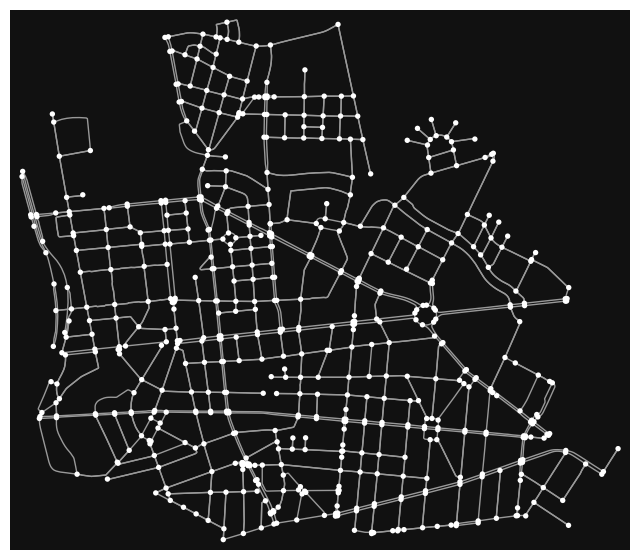

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [38]:
## Show Charlottenburg road network

G = ox.graph_from_place(PLACE_NAME, network_type='drive')
ox.plot_graph(G) 

In [41]:
## plot the roads on a basemap
ox.plot_graph_folium(G)

/var/folders/xc/ybqx5fnx6_d179dtm1llyflw0000gn/T/ipykernel_8277/2220924703.py:2: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx usage example repo for complete details and demonstrations.
  ox.plot_graph_folium(G)


In [42]:
ox.graph_to_gdfs(G, nodes=False).explore()

In [43]:
## plot the bike network on a basemap

# G = ox.graph_from_place(PLACE_NAME, network_type='bike')
# type(G)
# ox.plot_graph_folium(G)

In [44]:
## create edge and node dataframes from road graph object
area,edges = ox.graph_to_gdfs(G)
area.head(2)

y          x  ref            highway  street_count  \
osmid                                                                
458330  52.511557  13.286217    7  motorway_junction             3   
458334  52.514265  13.286467  NaN                NaN             3   

                         geometry  
osmid                              
458330  POINT (13.28622 52.51156)  
458334  POINT (13.28647 52.51426)

In [45]:
edges.head(2)

osmid  oneway lanes        highway maxspeed reversed  \
u      v        key                                                             
458330 26708458 0      4434508    True     2  motorway_link       50    False   
       458334   0    227985278    True     3       motorway       60    False   

                      length  \
u      v        key            
458330 26708458 0    166.618   
       458334   0    302.682   

                                                              geometry    ref  \
u      v        key                                                             
458330 26708458 0    LINESTRING (13.28622 52.51156, 13.28640 52.511...    NaN   
       458334   0    LINESTRING (13.28622 52.51156, 13.28637 52.512...  A 100   

                    bridge name width junction access tunnel  
u      v        key                                           
458330 26708458 0      NaN  NaN   NaN      NaN    NaN    NaN  
       458334   0      NaN  NaN   NaN      NaN    NaN    NaN

In [46]:
area.explore()

In [47]:
## extract benches from the area

benches = ox.geometries_from_place(PLACE_NAME, tags={'amenity':'bench'})
benches.head(2)

amenity backrest                   geometry colour  \
element_type osmid                                                          
node         540048258   bench      yes  POINT (13.29559 52.50190)    NaN   
             540048259   bench      yes  POINT (13.29630 52.50167)    NaN   

                       material seats check_date direction level indoor  ...  \
element_type osmid                                                       ...   
node         540048258      NaN   NaN        NaN       NaN   NaN    NaN  ...   
             540048259      NaN   NaN        NaN       NaN   NaN    NaN  ...   

                        bin manufacturer name operator access survey:date  \
element_type osmid                                                          
node         540048258  NaN          NaN  NaN      NaN    NaN         NaN   
             540048259  NaN          NaN  NaN      NaN    NaN         NaN   

                       nodes area barrier height  
element_type osmid                                
node         540048258   NaN  NaN     NaN    NaN  
             540048259   NaN  NaN     NaN    NaN  

[2 rows x 24 columns]

In [48]:
type(benches)

geopandas.geodataframe.GeoDataFrame

In [49]:
## extract parks from the area

parks = ox.geometries_from_place(PLACE_NAME, tags={'leisure':'park'})
parks.head();
# parks

In [50]:
## extract water fountains from the area

water_fountains = ox.geometries_from_place(PLACE_NAME, tags={'amenity':'drinking_water'})
water_fountains.head()


amenity                     description  \
element_type osmid                                                        
node         449162395   drinking_water                    Trinkbrunnen   
             449162399   drinking_water                    Trinkbrunnen   
             789400935   drinking_water                    Trinkbrunnen   
             5964902317  drinking_water  Berliner Trinkbrunnen; Mai-Okt   
             6284246623  drinking_water                    Trinkbrunnen   

                        fountain                 name wheelchair  \
element_type osmid                                                 
node         449162395   bubbler  Wiener Trinkbrunnen    limited   
             449162399   bubbler                  NaN        yes   
             789400935   bubbler                  NaN    limited   
             5964902317  bubbler                  NaN    limited   
             6284246623  bubbler                  NaN    limited   

                                          geometry                 operator  \
element_type osmid                                                            
node         449162395   POINT (13.32504 52.50274)                      NaN   
             449162399   POINT (13.32768 52.50325)                      NaN   
             789400935   POINT (13.33048 52.50340)  Berliner Wasserbetriebe   
             5964902317  POINT (13.29611 52.51924)  Berliner Wasserbetriebe   
             6284246623  POINT (13.30693 52.50584)  Berliner Wasserbetriebe   

                        operator:wikidata          operator:wikipedia access  \
element_type osmid                                                             
node         449162395                NaN                         NaN    NaN   
             449162399                NaN                         NaN    NaN   
             789400935            Q821856  de:Berliner Wasserbetriebe    NaN   
             5964902317           Q821856  de:Berliner Wasserbetriebe    yes   
             6284246623           Q821856  de:Berliner Wasserbetriebe    yes   

                        bottle colour drinking_water  fee       seasonal type  \
element_type osmid                                                              
node         449162395     NaN    NaN            NaN  NaN            NaN  NaN   
             449162399     NaN    NaN            NaN  NaN            NaN  NaN   
             789400935     NaN    NaN            NaN  NaN            NaN  NaN   
             5964902317    yes   blue            yes   no            NaN  NaN   
             6284246623    yes    NaN            NaN   no  April-Oktober  NaN   

                        source covered indoor  lit  
element_type osmid                                  
node         449162395     NaN     NaN    NaN  NaN  
             449162399     NaN     NaN    NaN  NaN  
             789400935     NaN     NaN    NaN  NaN  
             5964902317    NaN     NaN    NaN  NaN  
             6284246623    NaN     NaN    NaN  NaN

In [51]:
import geopandas as gpd
type(water_fountains)

geopandas.geodataframe.GeoDataFrame

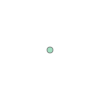

In [52]:
water_fountains.geometry[0]

In [53]:
# display the water fountains on a map
m = folium.Map(location=[52.516667, 13.4], zoom_start=13)
folium.GeoJson(water_fountains).add_to(m)
m

In [54]:
# calculate the distance between water_fountains, osmid 449162399 and 449162395
water_fountains.geometry[0].distance(water_fountains.geometry[1])

0.0026836194700445544

In [55]:
# calculate distance between water_fountains[0] and benches[0]
water_fountains.geometry[0].distance(benches.geometry[0])

0.029463459935486148

In [56]:
# calculate the area of parks[0]
parks.geometry[0].area

1.1434470249968153e-06

In [70]:
import osmnx as ox

# Configure OSMnx
ox.config(use_cache=True, log_console=True)

# Fetch the geometrical boundary of the city
city = ox.geocode_to_gdf('San Francisco, California, USA')

# Calculate the area in square meters
area_m = city.area.values[0]

print("Area of San Francisco in square meters:", area_m)

# To convert to square kilometers:
area_km = area_m / (10**6)
print("Area of San Francisco in square kilometers:", area_km)


/var/folders/xc/ybqx5fnx6_d179dtm1llyflw0000gn/T/ipykernel_8277/1178789842.py:4: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


Area of San Francisco in square meters: 0.061496457045840586
Area of San Francisco in square kilometers: 6.149645704584059e-08


/var/folders/xc/ybqx5fnx6_d179dtm1llyflw0000gn/T/ipykernel_8277/1178789842.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_m = city.area.values[0]


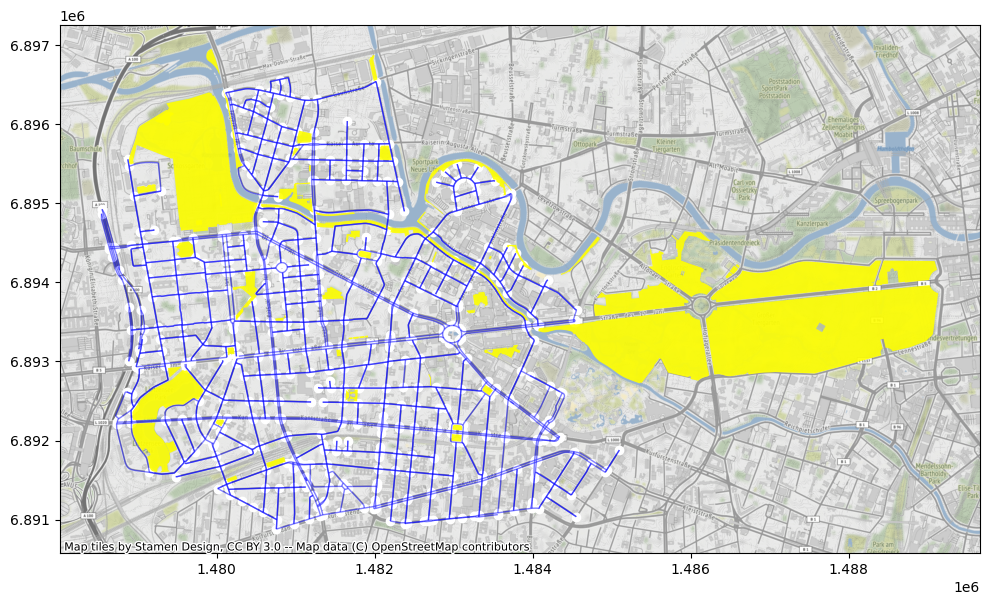

In [59]:
## show all the parks on the map

area_crs = area.to_crs('3857')
edges_crs = edges.to_crs('3857')
parks_crs = parks.to_crs('3857')

fig, ax = plt.subplots(figsize=(10, 14))
area_crs.plot(ax=ax, facecolor='white')
edges_crs.plot(ax=ax, linewidth=1, edgecolor='blue', alpha=0.5)
parks_crs.plot(ax=ax, color='yellow', alpha=0.9, markersize=22)
plt.tight_layout()
cx.add_basemap(ax,crs=area_crs.crs.to_string())

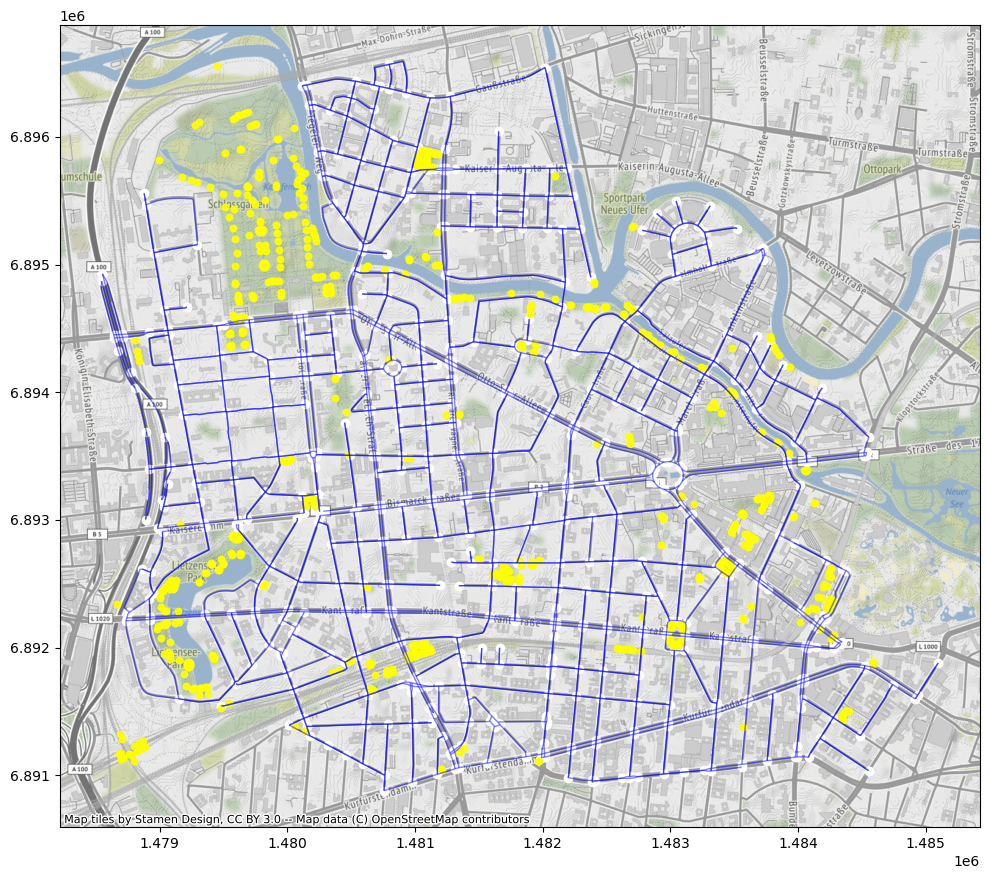

In [60]:
## show the benches on the map

area_crs = area.to_crs('3857')
edges_crs = edges.to_crs('3857')
benches_crs = benches.to_crs('3857')

fig, ax = plt.subplots(figsize=(10, 14))
area_crs.plot(ax=ax, facecolor='white')
edges_crs.plot(ax=ax, linewidth=1, edgecolor='blue', alpha=0.5)
benches_crs.plot(ax=ax, color='yellow', alpha=0.9, markersize=22)
plt.tight_layout()
cx.add_basemap(ax,crs=area_crs.crs.to_string())



In [61]:
## geocode_to_gdf allows you to use nominatim api to geocode a place name.
## https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geocoder.geocode_to_gdf

origin = (
    ox.geocode_to_gdf("zoologischer garten")
    .to_crs(edges.crs)  
    .at[0, "geometry"]  
    .centroid  
)

destination = (
    ox.geocode_to_gdf("Charlottenburg, Berlin, Germany")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid 
)

origin_node_id = ox.nearest_nodes(G, origin.x, origin.y)
destination_node_id = ox.nearest_nodes(G, destination.x, destination.y)

In [62]:
route = ox.shortest_path(G, origin_node_id, destination_node_id)
route;

In [63]:
## create a route passes all the water fountains
route = ox.shortest_path(G, origin_node_id, destination_node_id, weight="length")
route;

In [64]:
ox.plot_route_folium(G, route, route_linewidth=6, node_size=0)
# ox.plot_route_folium(G, extended_route, route_linewidth=6, node_size=0)

/var/folders/xc/ybqx5fnx6_d179dtm1llyflw0000gn/T/ipykernel_8277/2620764708.py:1: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx usage example repo for complete details and demonstrations.
  ox.plot_route_folium(G, route, route_linewidth=6, node_size=0)


# overpy package

In [65]:
# pip install overpy

## running a single query without osmnx
## use overpy to extract all the benches in a grid located around DSR

import overpy
api = overpy.Overpass()
result = api.query("""
            [out:json];
                node["amenity"="bench"](52.495,13.32,52.51,13.35);
            out body;
            >;
            out skel qt;
            """)

len(result.nodes)
## 222 benches in this area

222

# nominatim API

In [66]:
## use nominatim through osmnx

# Geocode the location
location = ox.geocode('Charlottenburg, Berlin, Germany')

print(location)
# (52.515747, 13.3096834)

(52.515747, 13.3096834)
